***Experiment 3***<br>
Aim:-Implement various Regression techniques for prediction.

**To perform Multiple Linear Regression in Python, you can use various libraries and packages. Here are some commonly used ones:**
<ol>
<Li><b>NumPy</b>: NumPy is a fundamental package for scientific computing with Python,
and it provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.</li>
<li><b>pandas:</b> pandas is a powerful data manipulation library that provides data structures like DataFrame, which is particularly useful for handling structured data.</li>
<li><b>scikit-learn:</b> scikit-learn is a machine learning library that includes tools for various machine learning tasks, including regression analysis. It provides a convenient interface for linear regression and many other algorithms.</li>

<b><h3>1.Loading Dataset

In [1]:
dataset_path = '/content/sample_data/covid_19_clean_complete.csv'
# Load the dataset into a Pandas DataFrame
import pandas as pd
df = pd.read_csv(dataset_path)


In [2]:
# Display summary statistics of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [3]:
# Display basic statistics for each numerical column
df.describe()


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [4]:
# Display the first few rows of the dataset
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


<b><h3>Create a model and fit it

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
Mean Squared Error: 18859964705.207546
R-squa

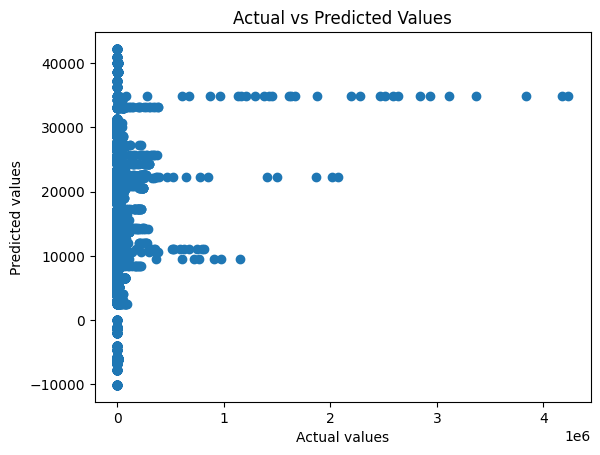

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print(df.head())
print(df.columns)

features = ['Lat', 'Long']
target = 'Confirmed'

if not set(features).issubset(df.columns):
    missing_features = set(features) - set(df.columns)
    raise ValueError(f"Features {missing_features} not found in the dataset.")

if target not in df.columns:
    raise ValueError(f"Target variable {target} not found in the dataset.")

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()


<b><h3>Get the values : Coefficient of Determination, Intercept and Coefficients

Coefficient of Determination (R-squared): 0.008789406445800063
Intercept: 17233.224236284295
Coefficients: [ 118.79693938 -128.32091937]
Mean Squared Error: 18859964705.207546
R-squared: 0.008789406445800063


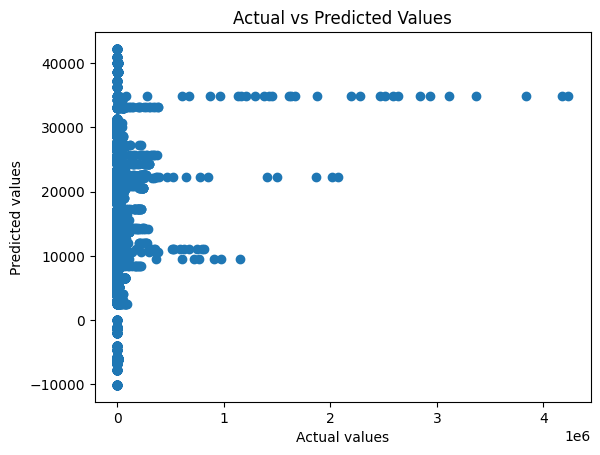

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

features = ['Lat', 'Long']
target = 'Confirmed'

if not set(features).issubset(df.columns):
    missing_features = set(features) - set(df.columns)
    raise ValueError(f"Features {missing_features} not found in the dataset.")

if target not in df.columns:
    raise ValueError(f"Target variable {target} not found in the dataset.")

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

r_squared = model.score(X_test, y_test)
print(f'Coefficient of Determination (R-squared): {r_squared}')

intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()


<h3><b>Predict the response

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

features = ['Lat', 'Long']
target = 'Confirmed'

if not set(features).issubset(df.columns):
    missing_features = set(features) - set(df.columns)
    raise ValueError(f"Features {missing_features} not found in the dataset.")

if target not in df.columns:
    raise ValueError(f"Target variable {target} not found in the dataset.")

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

new_data = pd.DataFrame({'Lat': [35.0], 'Long': [10.0]})

predicted_confirmed = model.predict(new_data)

print(f'Predicted Confirmed cases: {predicted_confirmed}')


Predicted Confirmed cases: [20107.90792087]


<b><h3>Visualize the results with a graph

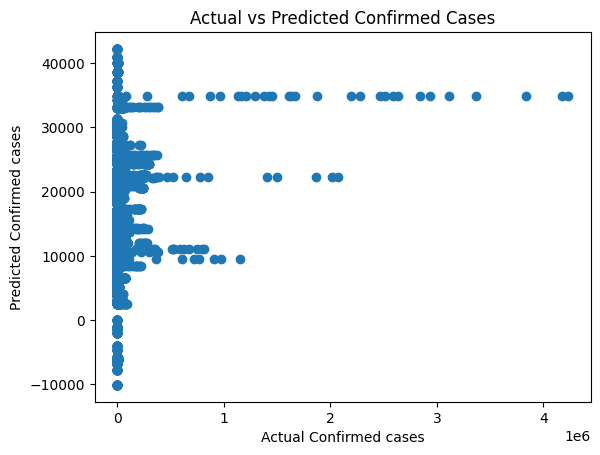

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

features = ['Lat', 'Long']
target = 'Confirmed'

if not set(features).issubset(df.columns):
    missing_features = set(features) - set(df.columns)
    raise ValueError(f"Features {missing_features} not found in the dataset.")

if target not in df.columns:
    raise ValueError(f"Target variable {target} not found in the dataset.")

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Confirmed cases')
plt.ylabel('Predicted Confirmed cases')
plt.title('Actual vs Predicted Confirmed Cases')
plt.show()


<h3><b>Implementation in R

<h3><b>Importing dataset

In [1]:
dataset_path <- '/content/sample_data/covid_19_clean_complete.csv'
df <- read.csv(dataset_path)
head(df)


,Province.State,Country.Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO.Region
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,,Afghanistan,33.93911,67.70995,2020-01-22,0,0,0,0,Eastern Mediterranean
2,,Albania,41.15330,20.16830,2020-01-22,0,0,0,0,Europe
3,,Algeria,28.03390,1.65960,2020-01-22,0,0,0,0,Africa
4,,Andorra,42.50630,1.52180,2020-01-22,0,0,0,0,Europe
5,,Angola,-11.20270,17.87390,2020-01-22,0,0,0,0,Africa
6,,Antigua and Barbuda,17.06080,-61.79640,2020-01-22,0,0,0,0,Americas


<h3><b>Display the summary of the dataset

In [2]:
# Display the summary of the dataset
summary(df)


 Province.State     Country.Region          Lat               Long        
 Length:49068       Length:49068       Min.   :-51.796   Min.   :-135.00  
 Class :character   Class :character   1st Qu.:  7.873   1st Qu.: -15.31  
 Mode  :character   Mode  :character   Median : 23.634   Median :  21.75  
                                       Mean   : 21.434   Mean   :  23.53  
                                       3rd Qu.: 41.204   3rd Qu.:  80.77  
                                       Max.   : 71.707   Max.   : 178.06  
     Date             Confirmed           Deaths           Recovered      
 Length:49068       Min.   :      0   Min.   :     0.0   Min.   :      0  
 Class :character   1st Qu.:      4   1st Qu.:     0.0   1st Qu.:      0  
 Mode  :character   Median :    168   Median :     2.0   Median :     29  
                    Mean   :  16885   Mean   :   884.2   Mean   :   7916  
                    3rd Qu.:   1518   3rd Qu.:    30.0   3rd Qu.:    666  
                    Max. 

In [23]:
str(df)


'data.frame':	49068 obs. of  10 variables:
 $ Province.State: chr  "" "" "" "" ...
 $ Country.Region: chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Lat           : num  33.9 41.2 28 42.5 -11.2 ...
 $ Long          : num  67.71 20.17 1.66 1.52 17.87 ...
 $ Date          : chr  "2020-01-22" "2020-01-22" "2020-01-22" "2020-01-22" ...
 $ Confirmed     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Deaths        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Active        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WHO.Region    : chr  "Eastern Mediterranean" "Europe" "Africa" "Europe" ...


<b><h3>Create a model and fit it

In [5]:
install.packages("caTools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




  Province.State      Country.Region       Lat      Long       Date Confirmed
1                        Afghanistan  33.93911  67.70995 2020-01-22         0
2                            Albania  41.15330  20.16830 2020-01-22         0
3                            Algeria  28.03390   1.65960 2020-01-22         0
4                            Andorra  42.50630   1.52180 2020-01-22         0
5                             Angola -11.20270  17.87390 2020-01-22         0
6                Antigua and Barbuda  17.06080 -61.79640 2020-01-22         0
  Deaths Recovered Active            WHO.Region
1      0         0      0 Eastern Mediterranean
2      0         0      0                Europe
3      0         0      0                Africa
4      0         0      0                Europe
5      0         0      0                Africa
6      0         0      0              Americas
 [1] "Province.State" "Country.Region" "Lat"            "Long"          
 [5] "Date"           "Confirmed"      "Death

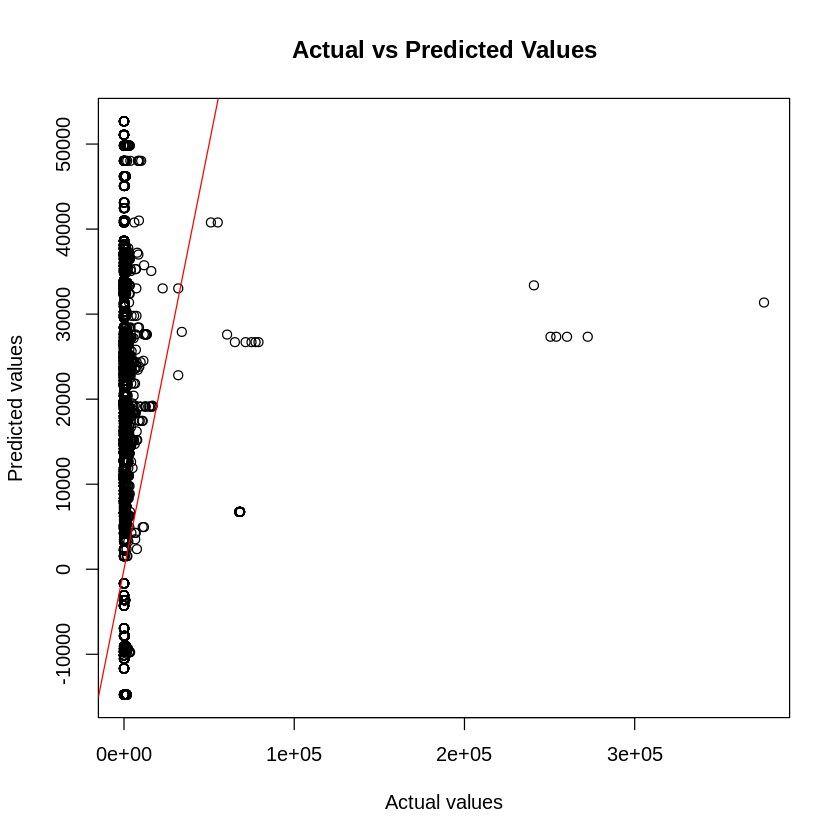

In [22]:
library(caTools)

print(head(df))
print(colnames(df))

features <- c('Lat', 'Long')
target <- 'Confirmed'

if (!all(features %in% colnames(df))) {
    missing_features <- setdiff(features, colnames(df))
    stop(paste("Features", missing_features, "not found in the dataset."))
}

if (!(target %in% colnames(df))) {
    stop(paste("Target variable", target, "not found in the dataset."))
}

X <- df[, features]
y <- df[, target]

X <- as.data.frame(sapply(X, as.numeric))
y <- as.numeric(y)

set.seed(42)
split <- sample.split(y, SplitRatio = 0.8)
X_train <- subset(X, split == TRUE)
X_test <- subset(X, split == FALSE)
y_train <- subset(y, split == TRUE)
y_test <- subset(y, split == FALSE)

train_data <- data.frame(cbind(y_train, X_train))

model <- lm(y_train ~ Lat + Long, data = train_data)

test_data <- data.frame(cbind(y_test, X_test))
y_pred <- predict(model, newdata = test_data)

mse <- mean((y_test - y_pred)^2)
r2 <- 1 - mse / var(y_test)

print(paste("Mean Squared Error:", mse))
print(paste("R-squared:", r2))

plot(y_test, y_pred, xlab = 'Actual values', ylab = 'Predicted values', main = 'Actual vs Predicted Values')
abline(0, 1, col = 'red')


<b><h3>Get the values : Coefficient of Determination, Intercept and Coefficients

In [15]:
install.packages("Metrics")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Coefficient of Determination (R-squared): 0.01848937 
Intercept: 49260.84 
Coefficients: 234.3245 -422.6474 
Mean Squared Error: 2865255147 
R-squared: -40.62214 


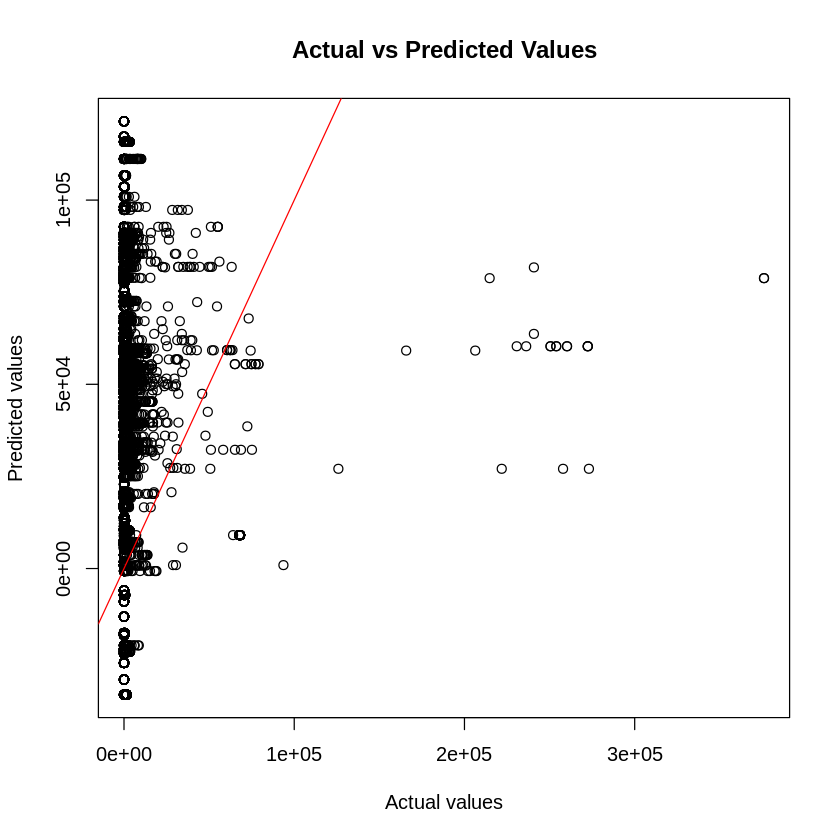

In [19]:
library(caTools)

features <- c('Lat', 'Long')
target <- 'Confirmed'

if (!all(features %in% colnames(df))) {
    missing_features <- setdiff(features, colnames(df))
    stop(paste("Features", missing_features, "not found in the dataset."))
}

if (!(target %in% colnames(df))) {
    stop(paste("Target variable", target, "not found in the dataset."))
}

X <- df[, features]
y <- df[, target]

set.seed(42)
split <- sample.split(y, SplitRatio = 0.2)
X_train <- subset(X, split == TRUE)
X_test <- subset(X, split == FALSE)
y_train <- subset(y, split == TRUE)
y_test <- subset(y, split == FALSE)

model <- lm(y_train ~ ., data = cbind(y_train, X_train))

r_squared <- summary(model)$r.squared
cat("Coefficient of Determination (R-squared):", r_squared, "\n")

intercept <- coef(model)[1]
coefficients <- coef(model)[-1]
cat("Intercept:", intercept, "\n")
cat("Coefficients:", coefficients, "\n")

y_pred <- predict(model, newdata = X_test)

mse <- mean((y_test - y_pred)^2)
r2 <- 1 - mse / var(y_test)

cat("Mean Squared Error:", mse, "\n")
cat("R-squared:", r2, "\n")

plot(y_test, y_pred, xlab = 'Actual values', ylab = 'Predicted values', main = 'Actual vs Predicted Values')
abline(0, 1, col = 'red')


<h3><b>Predict the response

In [18]:

library(caTools)

features <- c('Lat', 'Long')
target <- 'Confirmed'

if (!all(features %in% colnames(df))) {
    missing_features <- setdiff(features, colnames(df))
    stop(paste("Features", missing_features, "not found in the dataset."))
}

if (!(target %in% colnames(df))) {
    stop(paste("Target variable", target, "not found in the dataset."))
}

X <- df[, features]
y <- df[, target]

set.seed(42)
split <- sample.split(y, SplitRatio = 0.2)
X_train <- subset(X, split == TRUE)
X_test <- subset(X, split == FALSE)
y_train <- subset(y, split == TRUE)
y_test <- subset(y, split == FALSE)

model <- lm(y_train ~ ., data = cbind(y_train, X_train))

new_data <- data.frame(Lat = 35.0, Long = 10.0)

predicted_confirmed <- predict(model, newdata = new_data)

cat("Predicted Confirmed cases:", predicted_confirmed, "\n")


Predicted Confirmed cases: 53235.73 


<b><h3>Visualize the results with a graph

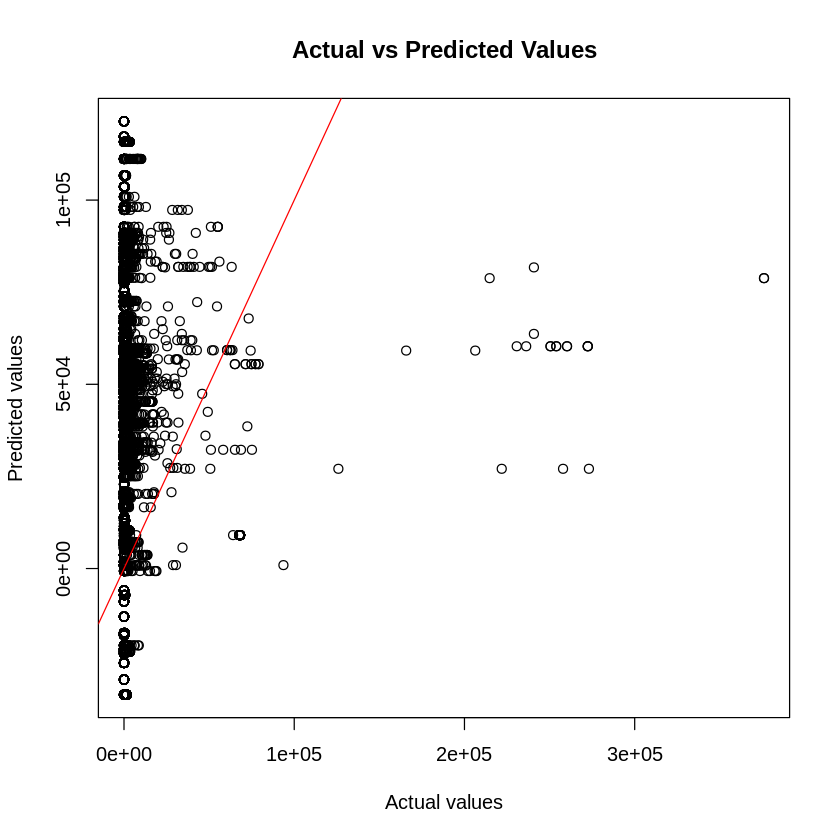

In [20]:

library(caTools)

features <- c('Lat', 'Long')
target <- 'Confirmed'

if (!all(features %in% colnames(df))) {
    missing_features <- setdiff(features, colnames(df))
    stop(paste("Features", missing_features, "not found in the dataset."))
}

if (!(target %in% colnames(df))) {
    stop(paste("Target variable", target, "not found in the dataset."))
}

X <- df[, features]
y <- df[, target]

set.seed(42)
split <- sample.split(y, SplitRatio = 0.2)
X_train <- subset(X, split == TRUE)
X_test <- subset(X, split == FALSE)
y_train <- subset(y, split == TRUE)
y_test <- subset(y, split == FALSE)

model <- lm(y_train ~ ., data = cbind(y_train, X_train))

y_pred <- predict(model, newdata = X_test)

plot(y_test, y_pred, xlab = 'Actual values', ylab = 'Predicted values', main = 'Actual vs Predicted Values')
abline(0, 1, col = 'red')
